# Pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
%matplotlib notebook

## Import system module

In [3]:
from pydae.solvers import daesolver as py_daesolver
from pendulum_dae import pendulum_dae_class,run,daesolver

## Solution function

In [4]:
def perturbations(t,struct):
    pass

def test(solver_type):
    syst = pendulum_dae_class()

    syst.Dt = 1e-3
    syst.t_end = 4.5

    syst.update()

    syst.struct[0].imax = 50
    syst.struct[0].itol = 1e-8
    syst.struct[0].solvern = 5
    
    m = 1
    G = 9.81
    s= 1
    theta_0 = np.pi/2*0.9
    x_0 = s*np.cos(theta_0)
    y_0 = s*np.sin(theta_0)
    syst.struct[0].x[0,0] = x_0
    syst.struct[0].x[1,0] = y_0
    syst.struct[0].y[0,0] = m*(1+s*G)/2*s**2
    syst.struct[0].m = m
    if solver_type == 'no_numba':  
        T,X,Y = py_daesolver(run,syst.struct,perturbations)
        
    if solver_type == 'with_numba':  
        T,X = daesolver(syst.struct)

    return syst
    

### Benchmark without numba

In [5]:
%timeit syst  = test('no_numba')

31.1 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Benchmark using numba

In [6]:
%timeit syst  = test('with_numba')

54.7 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
syst  = test('with_numba')
T = syst.struct[0]['T'][:syst.struct[0].it_store]
X = syst.struct[0]['X'][:syst.struct[0].it_store,:]

### Results

<IPython.core.display.Javascript object>


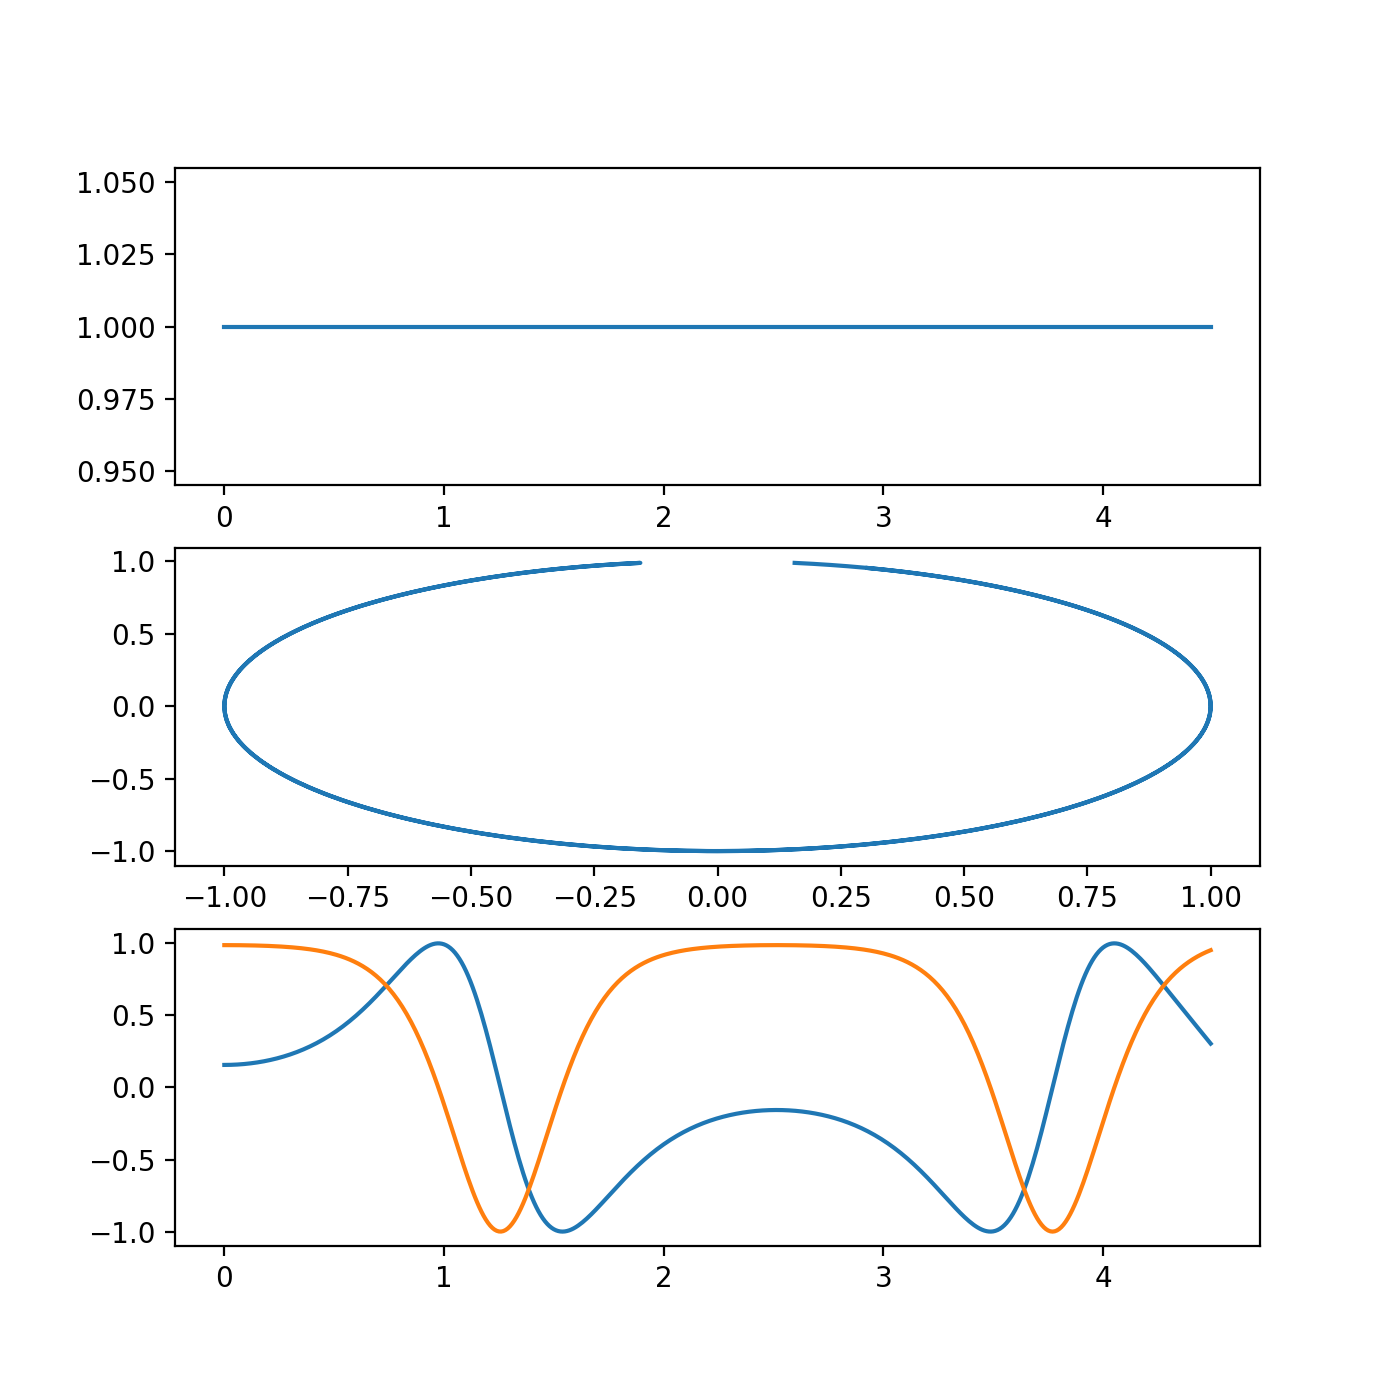

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes[1].plot(X[:,0], X[:,1])
axes[0].plot(T,(X[:,0]**2+X[:,1]**2)**0.5)
axes[2].plot(T, X[:,0])
axes[2].plot(T, X[:,1])

### Animation

<IPython.core.display.Javascript object>


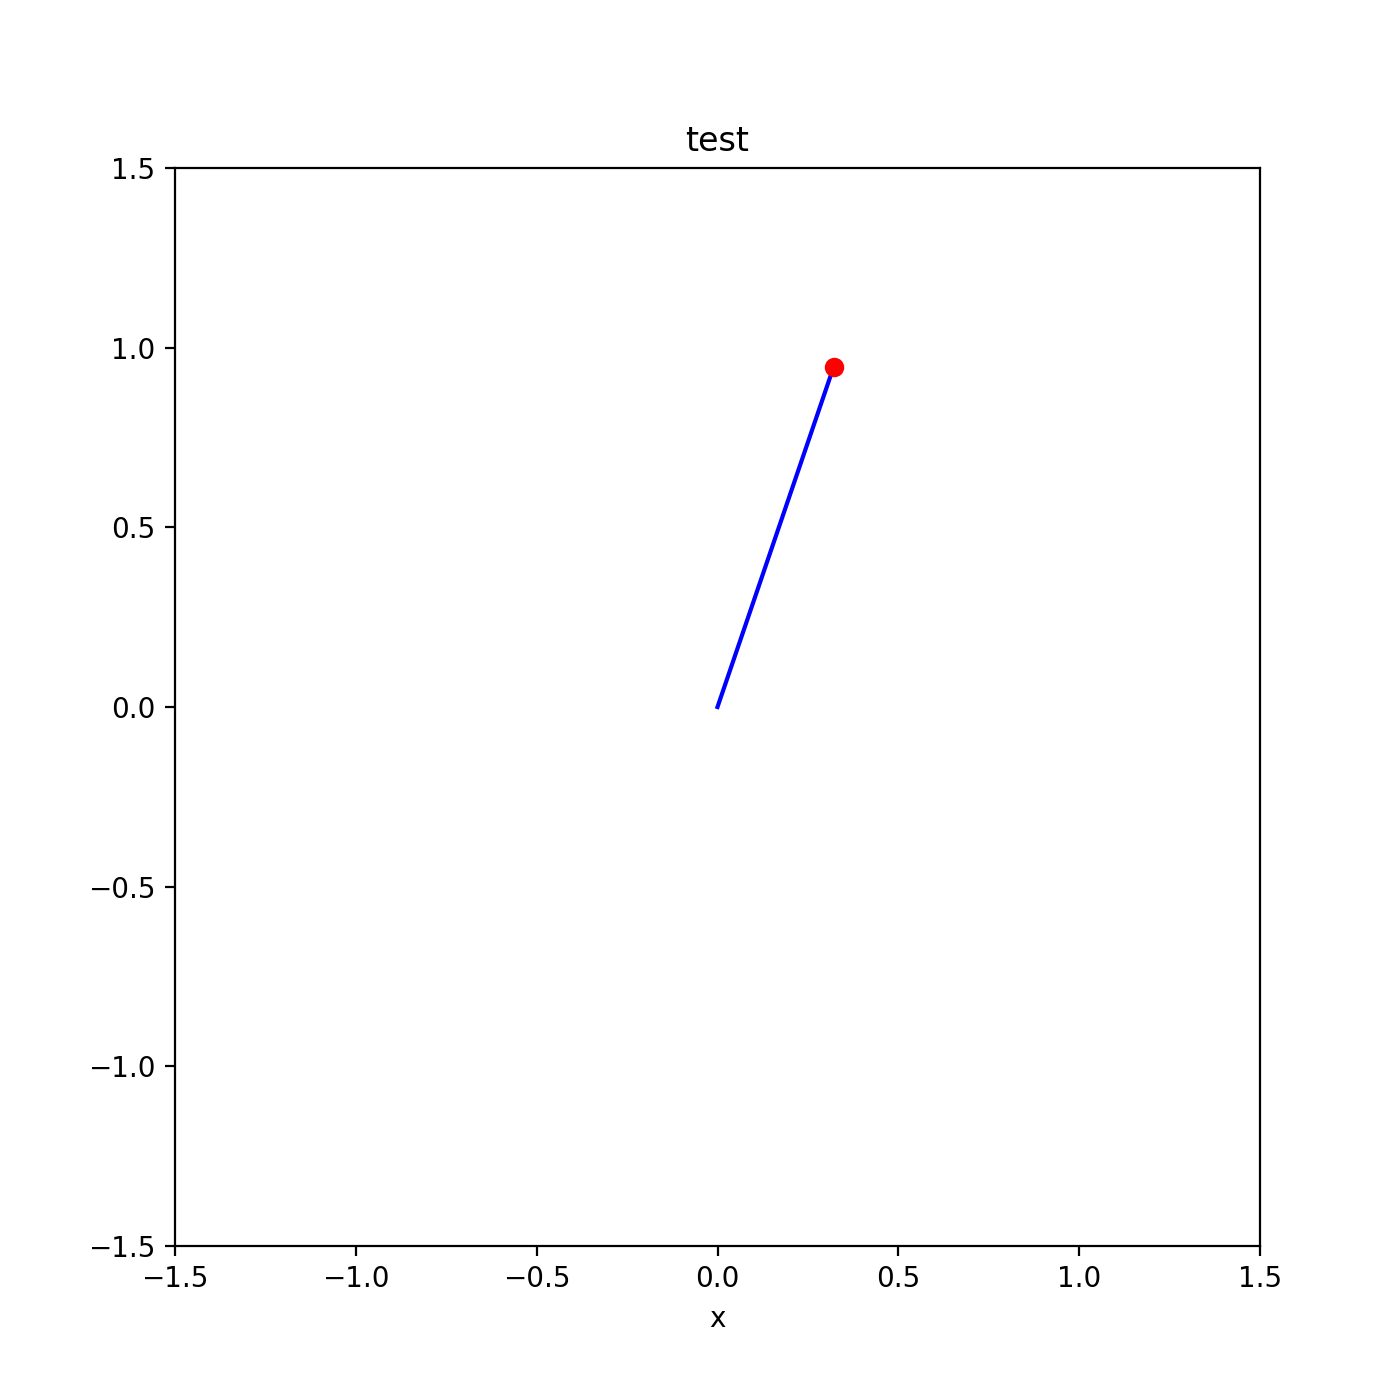

In [106]:
def update(num, data, mass,bar):
    T,X=data
    bar.set_data([0,X[num,0]],[0,X[num,1]])
    mass.set_data(X[num,0],X[num,1])
    return bar,

fig1 = plt.figure( figsize=(7, 7))

# Fixing random state for reproducibility

data = [T,X]
bar, = plt.plot([], [], 'b-')
mass, = plt.plot([], [], 'ro')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update, fargs=(data, mass,bar),
                                   interval=50, blit=True, repeat=True)